In [ ]:
!pip install gensim


In [1]:
import gensim

import gensim.downloader
import numpy as np

Part 1: Word Embeddings

In [2]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798075318336487), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.723637580871582), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545308232307434), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.8798075


Part 1a

In [3]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group
# 1. Load the pre-trained GloVe model
model = gensim.downloader.load("glove-wiki-gigaword-100")

# 2. Choose the word you want to explore
word_of_choice = "park"

# 3. Find the top 10 most similar words
most_similar_words = model.most_similar(word_of_choice, topn=10)

# 4. Print out the results
print(f"Most similar words to '{word_of_choice}':")
for similar_word, similarity_score in most_similar_words:
    print(f"{similar_word}: {similarity_score:.4f}")

Most similar words to 'park':
parks: 0.7290
riverside: 0.6925
hill: 0.6913
recreation: 0.6909
forest: 0.6692
garden: 0.6671
hall: 0.6595
gardens: 0.6573
road: 0.6527
located: 0.6472


I observed that when I queried the model for words similar to “park,” it returned terms like “parks,” “riverside,” “hill,” “recreation,” and “forest.” These words are closely related to outdoor and natural environments, which makes sense given the context of a park. I looked up a few unfamiliar terms, such as “riverside,” and confirmed that they describe natural features. This observation shows that the model effectively groups semantically related words, reflecting common contexts where parks and nature intersect.

In [4]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827144503593445), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174004554749), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.6407975554466248), ('le', 0.6403627991676331), ('strasbourg', 0.6346525549888611)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475124180316925), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403284788131714)]
[('dogs', 0.8921768069267273), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512701153755188), ('pets', 0.7392118573188782), ('cows', 0.6835323572158813), ('pet', 0.679297685623169), ('horses', 0.6774963736534119), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [5]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483972549438), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736048221588), ('rangers', 0.39962300658226013), ('utd', 0.3967454433441162)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772217750549316),
 ('dentist', 0.669424295425415),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [6]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document
# Choose a dimension index to isolate (e.g., index 5)
dim_index = 5

# Create a unit vector (delta) that only has a 1 at the chosen dimension
delta = np.zeros(model.vector_size)
delta[dim_index] = 1.0

# Define a list of words to test this effect
words = ["happy", "sad", "doctor", "nurse"]

# For each word, add the delta and print the most similar words
for word in words:
    modified_vector = model[word] + delta
    similar_words = model.most_similar(positive=[modified_vector], topn=5)
    print(f"Words most similar to '{word}' after adding dimension {dim_index}:")
    for similar_word, score in similar_words:
        print(f"  {similar_word}: {score:.4f}")
    print()

Words most similar to 'happy' after adding dimension 5:
  happy: 0.9831
  'm: 0.8336
  feel: 0.8108
  're: 0.7906
  everyone: 0.7840

Words most similar to 'sad' after adding dimension 5:
  sad: 0.9860
  sorry: 0.7477
  awful: 0.7092
  tragic: 0.7059
  horrible: 0.6892

Words most similar to 'doctor' after adding dimension 5:
  doctor: 0.9845
  physician: 0.7541
  nurse: 0.7432
  patient: 0.7101
  doctors: 0.7047

Words most similar to 'nurse' after adding dimension 5:
  nurse: 0.9843
  doctor: 0.7486
  nurses: 0.7269
  therapist: 0.6834
  physician: 0.6800



I observed that after adding dimension 5 to words like “happy,” “sad,” “doctor,” and “nurse,” the most similar words remained nearly unchanged. For instance, “happy” still returned “happy” as the top result, and “doctor” was still closely linked with “physician” and “nurse.” This indicates that dimension 5 doesn’t strongly shift semantic meaning or reveal pronounced bias. It makes me curious to explore other dimensions that might expose clearer biases or assumptions in the data.

Part 2: Visualization and Embeddings in Space

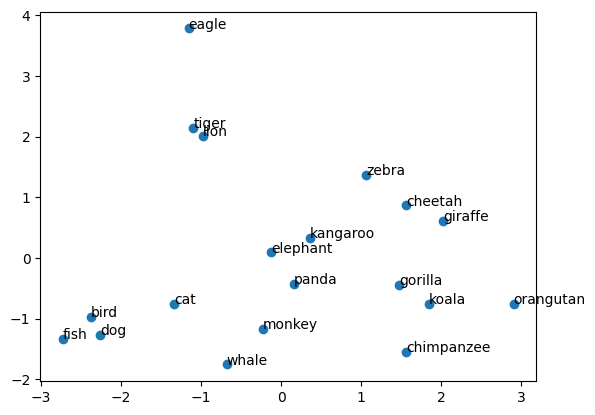

In [7]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

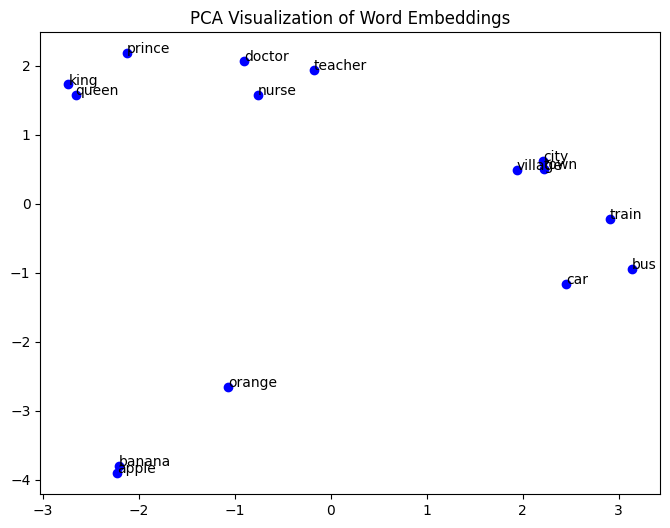

In [8]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

my_words = [
    "apple", "banana", "orange", 
    "car", "bus", "train", 
    "king", "queen", "prince", 
    "doctor", "nurse", "teacher", 
    "city", "town", "village"
]

# 3. Retrieve embeddings for each word
X = [model[word] for word in my_words]

# 4. Perform PCA down to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 5. Plot the 2D points
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], color='blue')

# 6. Label each point with its word
for i, word in enumerate(my_words):
    plt.annotate(word, (X_pca[i,0], X_pca[i,1]))

plt.title("PCA Visualization of Word Embeddings")
plt.show()

I observed that the PCA visualization groups similar words together in a way that aligns with my expectations. The fruits (apple, banana, orange) appear together on the lower-left, which makes sense given their shared category. The vehicles (car, bus, train) cluster on the lower-right, reflecting their functional similarities. I also noticed that the royalty terms (king, queen, prince) appear close to each other, and the professions (doctor, nurse, teacher) form another cluster. Finally, the location words (city, town, village) are grouped together on the right. Overall, I find these clusters consistent with the semantic relationships among the words.

In [9]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


Part 3: Embedding reddit posts

In [10]:
import pandas as pd
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [11]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

#using the code from project 1, clean the text and create a bag of words representation of the text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation, digits, special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Rejoin into a single string
    return ' '.join(tokens)

# Apply cleaning to the "text" column
data['cleaned_text'] = data['text'].astype(str).apply(clean_text)

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_text'])  # Features
y = data['label']                                  # Labels

print("Shape of Bag-of-Words matrix:", X.shape)
print("Number of samples:", X.shape[0])
print("Number of features (vocabulary size):", X.shape[1])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gauri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape of Bag-of-Words matrix: (9450, 16062)
Number of samples: 9450
Number of features (vocabulary size): 16062


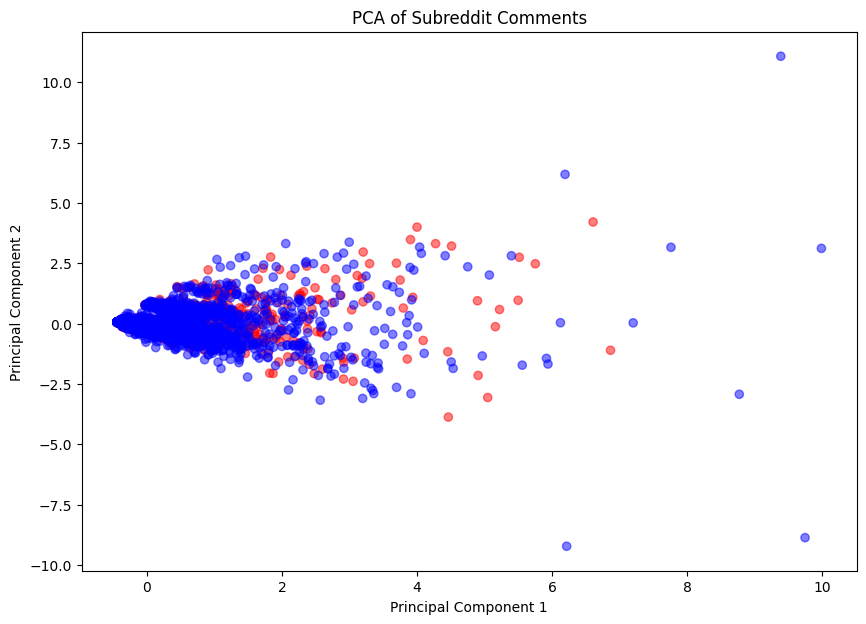

In [18]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['cleaned_text']).toarray()
pca= PCA(n_components=2)
pca_result = pca.fit_transform(X)
colors = ['blue' if label == 0 else 'red' for label in data['label']]
#color by the "label" column to see if the two subreddits are separable in the embedding space colors ['blue' if label=0 else 'red' for label in data['label']]
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, alpha=0.5)
plt.title("PCA of Subreddit Comments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



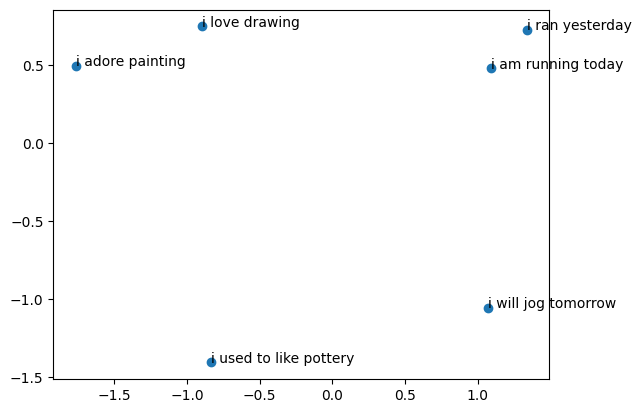

In [20]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

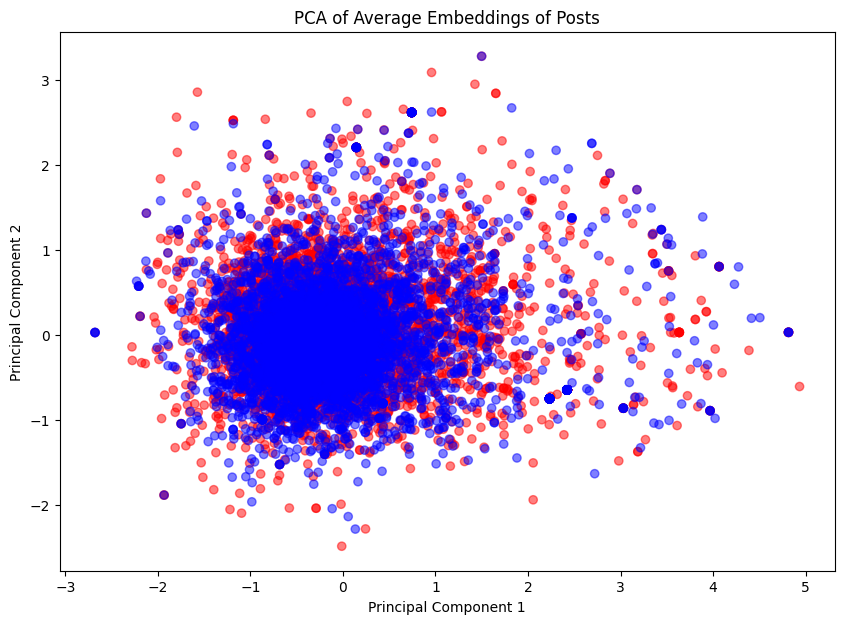

In [21]:
# Function to calculate the average embedding of a sentence
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    # Return a zero vector if no valid tokens are found
    if len(embeddings) == 0:
        return np.zeros(model.vector_size)
    return np.mean(embeddings, axis=0)

# Calculate the average embedding for each post in the dataset
avg_embeddings = [avg_embedding(post, model) for post in data['cleaned_text']]
avg_embeddings = np.array(avg_embeddings)

# Apply PCA to reduce the embeddings to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(avg_embeddings)

# Define colors based on the "label" column: blue for label 0, red for label 1
colors = ['blue' if label == 0 else 'red' for label in data['label']]

# Plot the PCA result
plt.figure(figsize=(10,7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, alpha=0.5)
plt.title("PCA of Average Embeddings of Posts")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

I observed that, similar to the bag-of-words PCA plot, the average-embedding plot shows a dense central cluster with considerable overlap between the red (UIUC) and blue (UMich) points. While this method uses semantic information from GloVe embeddings rather than raw word counts, there still isn’t a clear separation between the two subreddits in two-dimensional space. This suggests that even when capturing contextual meanings with embeddings, the linguistic differences between these subreddits may be too subtle for a straightforward PCA visualization to distinguish.

Part 4: HuggingFace and BERT

In [23]:
!pip install transformers

In [24]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


In [25]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [1]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
import pandas as pd
from transformers import pipeline

uiuc = pd.read_csv("uiuc.csv")
mich = pd.read_csv("umich.csv")

mich = mich.sample(n=4725)
uiuc["label"] = 1
mich["label"] = 0

data = pd.concat([uiuc, mich])

pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

def safe_sentiment(x):
    try:
        return pipe(x)[0]['label']
    except:
        return 'UNKNOWN'

data['sentiment'] = data['text'].astype(str).apply(safe_sentiment)

print(data['sentiment'].value_counts())

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (299 > 128). Running this sequence through the model will result in indexing errors


sentiment
NEU        4682
NEG        2229
POS        1949
UNKNOWN     590
Name: count, dtype: int64


In [2]:
#look at ten sample posts and labels; do you agree with all of them?
#The POS one WAS positive, and the NEU ones stated facts. 

sample = data[['text', 'sentiment']].sample(10, random_state=42)

for i, row in sample.iterrows():
    print(f"[{row['sentiment']}] {row['text'][:200]}...\n") 

[NEG] Not serious...

[NEU] They've told me and others that charges arn't finalized yet and we'll get an itemized receipt when they are (imo to get the heat off them until they decide they're all actually final later)...

[NEG] Women should never ever go to frat parties alone.  Never.

Many other orgs and clubs also throw… join one of those and go to their parties instead...

[POS] this is super helpful!!! thankyou!...

[NEG] If they ever ask for your SSN, assume it’s a scam...

[NEG] Did they say something that was incorrect? Or just that you didn’t want to hear?...

[NEU] Hey I’m also in East quad...

[NEU] They’re in the US...

[NEG] back then walking in the quad my weather app wouldn’t even load, how did y’all do anything  👁️👄👁️...

[NEU] Student tickets are 27 per game so I wouldn’t offer any more than 50...



In [3]:
#is the UIUC or Michigan subreddit more negative?
#The Michigan subreddit is slightly more negative than UIUC

In [4]:
neg_counts = data[data['sentiment'] == 'NEG']['label'].value_counts()
print(neg_counts)

label
0    1121
1    1108
Name: count, dtype: int64
